In [1]:
import tables
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def LoadBase():
    '''
    # to vanish the PMT difference, just a easy script
    # output: relative different bias
    '''
    path = './base.h5'
    h1 = tables.open_file(path)
    base = h1.root.correct[:]
    h1.close()
    return base

def ReadPMT():
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(r"./PMT_1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos

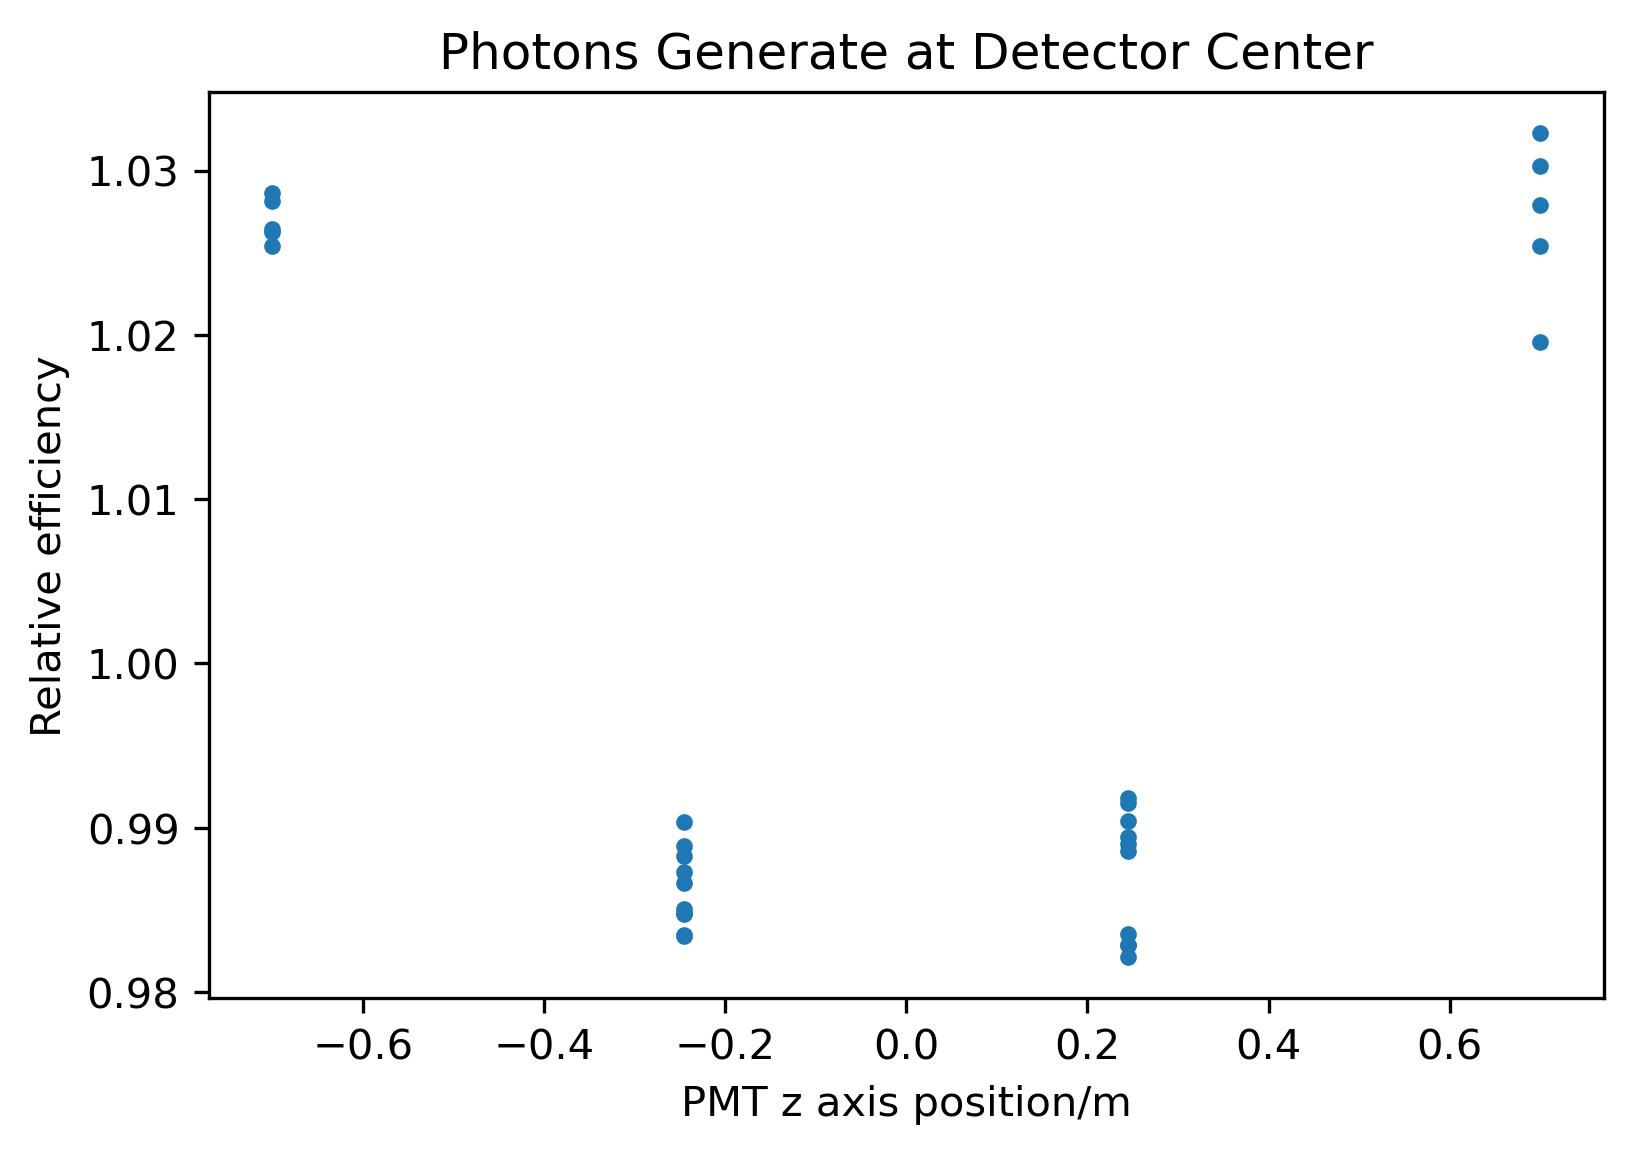

In [14]:
plt.figure(dpi=300)
PMT_pos = ReadPMT()
coeff = LoadBase()
plt.plot(PMT_pos[:,2],coeff,'.')
plt.xlabel('PMT z axis position/m')
plt.ylabel('Relative efficiency')
plt.title('Photons Generate at Detector Center')
plt.savefig('test.png')

In [16]:
def ReadPMT(file):
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(file)
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
ReadPMT(r"/cvmfs/juno.ihep.ac.cn/sl6_amd64_gcc830/Pre-Release/J20v1r0-Pre2/data/Simulation/ElecSim/pmtdata.txt")

FileNotFoundError: [Errno 2] No such file or directory: '/cvmfs/juno.ihep.ac.cn/sl6_amd64_gcc830/Pre-Release/J20v1r0-Pre2/data/Simulation/ElecSim/pmtdata.txt'

Text(0, 0.5, 'Likelihood')

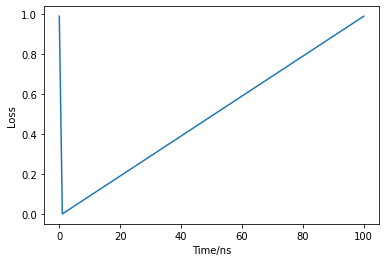

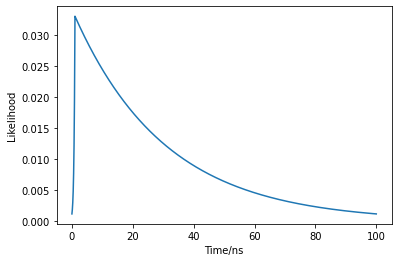

In [40]:
qt = 0.01
ts = 0.3
T = 1
ti = np.arange(0,100,0.01)
R = (1-qt)*(T-ti)*(ti<T) + qt*(ti-T)*(ti>T)
plt.plot(ti, R)
plt.xlabel('Time/ns')
plt.ylabel('Loss')

L = (qt*(1-qt)/ts) * np.exp(-R/ts)
plt.figure()
plt.plot(ti,L)
plt.xlabel('Time/ns')
plt.ylabel('Likelihood')